In [236]:
import collections as col
import itertools as it
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as ma


Функция для генерирования сетки 

In [237]:
def void_mesh(d1,d2,p,m,R,element_type):
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    PD = 2
    NoN = (m+1)*(p+1)*2+(m+1)*(p-1)*2
    NoE = 4*p*m
    NPE = 4
    NL = np.zeros([NoN,PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/p
    
    coor11 = np.zeros([(p+1)*(m+1),PD])
    
    for i in range(1,p+2):
        coor11[i-1,0] = q[0,0]+(i-1)*a
        coor11[i-1,1] = q[0,1]
    for i in range(1,p+2):
        coor11[m*(p+1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
        coor11[m*(p+1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor11[m*(p+1)+j-1,0]-coor11[j-1,0])/m
            dy = (coor11[m*(p+1)+j-1,1]-coor11[j-1,1])/m
            coor11[i*(p+1)+j-1,0] = coor11[(i-1)*(p+1)+j-1,0] + dx
            coor11[i*(p+1)+j-1,1] = coor11[(i-1)*(p+1)+j-1,1] + dy
    
    coor22 =np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2):
        coor22[i-1,0] = q[2,0]+(i-1)*a
        coor22[i-1,1] = q[2,1]
    for i in range(1,p+2):
        coor22[m*(p+1)+i-1,0] = d1/2 + R*np.cos((3*ma.pi/4)-(i-1)*ma.pi/(p*2))
        coor22[m*(p+1)+i-1,1] = d2/2 + R*np.sin((3*ma.pi/4)-(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor22[m*(p+1)+j-1,0]-coor22[j-1,0])/m
            dy = (coor22[m*(p+1)+j-1,1]-coor22[j-1,1])/m
            coor22[i*(p+1)+j-1,0] = coor22[(i-1)*(p+1)+j-1,0] + dx
            coor22[i*(p+1)+j-1,1] = coor22[(i-1)*(p+1)+j-1,1] + dy
            
    coor33 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor33[i-1,0] = q[0,0]
        coor33[i-1,1] = q[0,1] + i*b
    for i in range(1,p):
        coor33[m*(p-1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)-(i)*ma.pi/(p*2))
        coor33[m*(p-1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)-(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor33[m*(p-1)+j-1,0]-coor33[j-1,0])/m
            dy = (coor33[m*(p-1)+j-1,1]-coor33[j-1,1])/m
            coor33[i*(p-1)+j-1,0] = coor33[(i-1)*(p-1)+j-1,0] + dx
            coor33[i*(p-1)+j-1,1] = coor33[(i-1)*(p-1)+j-1,1] + dy
     
    coor44 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor44[i-1,0] = q[1,0]
        coor44[i-1,1] = q[1,1] + i*b
    for i in range(1,p):
        coor44[m*(p-1)+i-1,0] = d1/2 + R*np.cos((7*ma.pi/4)+(i)*ma.pi/(p*2))
        coor44[m*(p-1)+i-1,1] = d2/2 + R*np.sin((7*ma.pi/4)+(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor44[m*(p-1)+j-1,0]-coor44[j-1,0])/m
            dy = (coor44[m*(p-1)+j-1,1]-coor44[j-1,1])/m
            coor44[i*(p-1)+j-1,0] = coor44[(i-1)*(p-1)+j-1,0] + dx
            coor44[i*(p-1)+j-1,1] = coor44[(i-1)*(p-1)+j-1,1] + dy
     
    for i in range(1,m+2):
        NL[(i-1)*4*p:i*4*p,:] = np.vstack([coor11[(i-1)*(p+1):i*(p+1),:],coor44[(i-1)*(p-1):i*(p-1),:],np.flipud(coor22[(i-1)*(p+1):i*(p+1),:]),np.flipud(coor33[(i-1)*(p-1):i*(p-1),:])])
    

    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,4*p+1):
            if j == 1:
                EL[(i-1)*4*p+j-1,0] = (i-1)*4*p + j 
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
            elif j == 4*p:
                EL[(i-1)*4*p+j-1,0] = i*4*p
                EL[(i-1)*4*p+j-1,1] = (i-1)*4*p + 1
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p 
            else:
                EL[(i-1)*4*p+j-1,0] = EL[(i-1)*4*p+j-2,1]
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-2,2]
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
    if element_type == 'D2TR3N':
        NPEn = 3
        NoEn = 2*NoE
        ELn = np.zeros([NoEn,NPE])
        for i in range(1,NoE+1):
            ELn[2*(i-1),0] = EL[i-1,0] 
            ELn[2*(i-1),1] = EL[i-1,1] 
            ELn[2*(i-1),2] = EL[i-1,2] 
            ELn[2*(i-1)+1,0] = EL[i-1,0] 
            ELn[2*(i-1)+1,1] = EL[i-1,2] 
            ELn[2*(i-1)+1,2] = EL[i-1,3] 
        EL = ELn 
    EL = EL.astype(int)
    return NL,EL

Задаём параметры и константы

In [261]:
d1 = 1
d2 = 1
p = 4
p1 = 1
m1 = 1
m = 8
R = 0.05
mu = 0.3
E = 2*10**11
element_type = 'D2TR3N'


Выводим глобальную сетку

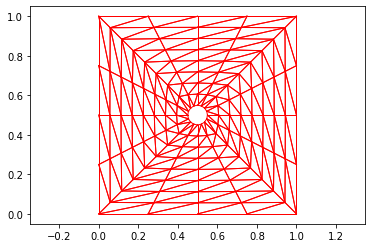

In [262]:
NL, EL = void_mesh(d1,d2,p,m,R,element_type)

x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
plt.axis('equal')
plt.plot(np.array([x0,x1]),np.array([y0,y1]),'red',linewidth=1);
plt.plot(np.array([x1,x2]),np.array([y1,y2]),'red',linewidth=1);
plt.plot(np.array([x2,x0]),np.array([y2,y0]),'red',linewidth=1);
EL = np.delete(EL,3,1)
EL = EL - np.ones((EL.shape[0],EL.shape[1]))
EL = EL.astype(int)


In [263]:
q = 1
eff = np.zeros((len(NL),2))
for i in range(len(NL)):
    if NL[i,0] == 0:
        if NL[i,1] == 0 or NL[i,1] == d1:
            eff[i,0] = -d1*q/p/2
        else: eff[i,0] = -d1*q/p
    elif NL[i,0] == d2:
        if NL[i,1] == 0 or NL[i,1] == d1:
            eff[i,0] = d1*q/p/2
        else: eff[i,0] = d1*q/p       


In [264]:

D = E/(1 - mu*mu)*np.array([[1,mu,0],[mu,1,0],[0,0, (1-mu)/2]])

In [265]:
def K_ok(A,lim):
    for i in range(int(len(lim)/2)):
        if lim[2*i] ==0 and lim[2*i+1] == 0:
            A[2*i:2*i+1,:]=A[2*i:2*i+1,:]*0
            A[:,2*i:2*i+1]=A[:,2*i:2*i+1]*0
            A[2*i,2*i] = 1
            A[2*i+1,2*i+1] = 1
    return A

In [266]:
#функция которой дают номера узлов, соответствующих элементу,
# и матрицу с координатами, а она считает определитель*2
def Det2(xi,yi,xj,yj,xk,yk):
    return (xj*(yk - yi) + xi*(yj - yk) + xk*(yi - yj))

In [267]:
def make_B(num,el_nod,Coord_nod,D):
    x,y,z = sp.symbols('x, y, z')
    ui,uj,uk = sp.var('ui uj uk')
    vi,vj,vk = sp.var('vi vj vk')
    wi,wj,wk = sp.var('wi wj wk')
    n = el_nod[num,0]
    m = el_nod[num,1]
    t = el_nod[num,2]
    # для конкретного элемента ищем координаты узлов
    xi = Coord_nod[n,0]
    yi = Coord_nod[n,1]
    xj = Coord_nod[m,0]
    yj = Coord_nod[m,1]
    xk = Coord_nod[t,0]
    yk = Coord_nod[t,1]
    # пользуемся формулами со слайда 29
    Det = Det2(xi,yi,xj,yj,xk,yk)
    ai = (xj*yk - xk*yj)/Det
    aj = (xk*yi - xi*yk)/Det
    ak = (xi*yj - xj*yi)/Det
    bi = (yj - yk)/Det
    bj = (yk - yi)/Det
    bk = (yi - yj)/Det
    ci = (xk - xj)/Det
    cj = (xi - xk)/Det
    ck = (xj - xi)/Det
    
    # собираем матрицу B
    Bi =[[bi, 0],[0, ci],[ci, bi]]
    Bj =[[bj, 0],[0, cj],[cj, bj]] 
    Bk =[[bk, 0],[0, ck],[ck, bk]] 
    B0 = np.hstack([Bi, Bj, Bk])
    
    return B0

In [268]:
def make_K(num,el_nod,Coord_nod,D):
    Bi = make_B(num,el_nod,Coord_nod,D)
    n = el_nod[num,0]
    m = el_nod[num,1]
    t = el_nod[num,2]
    xi = Coord_nod[n,0]
    yi = Coord_nod[n,1]
    xj = Coord_nod[m,0]
    yj = Coord_nod[m,1]
    xk = Coord_nod[t,0]
    yk = Coord_nod[t,1]
    return (Det2(xi,yi,xj,yj,xk,yk)/2)*Bi.T.dot(D).dot(Bi)

In [269]:
# глобальная K 
def sum_K(A,B,ind,num):
    for i in range(len(ind)):
        for j in range(len(ind)):
            ii = ind[i]
            jj = ind[j]
            A[ii*2:ii*2+2,jj*2:jj*2+2] += B[i*2:i*2+2,j*2:j*2+2]
    return A

In [270]:
def right(eff,num_nod):
    a = np.zeros(num_nod*2)
    for i in range(len(eff)):
            a[i*2] = eff[i,0]
            a[i*2+1] = eff[i,1]
            
    return a

In [271]:
def FEM(el_nod,Coord_nod,D,eff,Num_nod,Num_el):
    rig = right(eff,Num_nod)
    K0 = np.zeros((Num_nod*2,Num_nod*2))
    for i in range(0,Num_el):
        ind = el_nod[i,:]
        
        K0 = sum_K(K0,make_K(i,el_nod,Coord_nod,D),ind,i)
    #K0 = K_ok(K0,rig)
    
    U = np.linalg.solve(K0,rig.T)
    U.T.tofile('output.txt', sep = ' ')
    #U = Gauss(K0,np.array([rig]).T)
    #достать перемещения можно где-то здесь
    max_sig = 0
    max_sig_i = -1
    m_s=0
    m_s_i=-1
    lnap = np.matrix([-1,-1,-1])
    for i in range(Num_el):
        B = make_B(i,el_nod,Coord_nod,D)
        Ui = np.zeros((6))
        Ui[0] = U[el_nod[i,0]*2]
        Ui[1] = U[el_nod[i,0]*2+1]
        Ui[2] = U[el_nod[i,1]*2]
        Ui[3] = U[el_nod[i,1]*2+1]  
        Ui[4] = U[el_nod[i,2]*2]
        Ui[5] = U[el_nod[i,2]*2+1] 
        #деформации (эпсилон)    
        Eps = B.dot(Ui)
        
        # напряжения(сигма)
        Nap = D.dot(Eps) 
        lnap = np.append(lnap,[[Nap[0],Nap[1],Nap[2]]],axis=0)
        NapM = np.matrix([[Nap[0],Nap[2]],[Nap[2],Nap[1]]])
        
        Sig,s = np.linalg.eig(NapM) 
        
        now_sig = ma.sqrt(Nap[0]**2-Nap[0]*Nap[1]+Nap[1]**2+3*Nap[2]**2)
        
        if now_sig > max_sig:
            max_sig = now_sig
            max_sig_i = i
       
    print(max_sig)
    a = Coord_nod[el_nod[max_sig_i,0],:]
    b = Coord_nod[el_nod[max_sig_i,1],:]
    c = Coord_nod[el_nod[max_sig_i,2],:]
    print(a,b,c)
    for i in range(Num_nod):

        plt.plot(Coord_nod[i,0],Coord_nod[i,1],'b.')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(b[0],b[1],'r.')
    plt.plot(a[0],a[1],'r.')
    plt.plot(c[0],c[1],'r.')
    
    plt.axis('equal')
    lnap = np.delete(lnap,0,axis = 0)
    return U


1.986785636360013
[0.5479924  0.60291973] [0.5  0.55] [0.51913417 0.54619398]


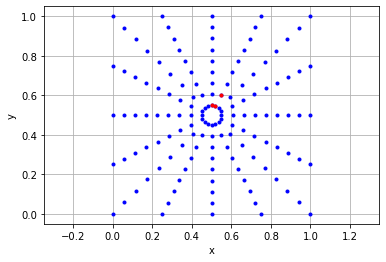

In [272]:
finalU = FEM(EL,NL,D,eff,len(NL),len(EL))


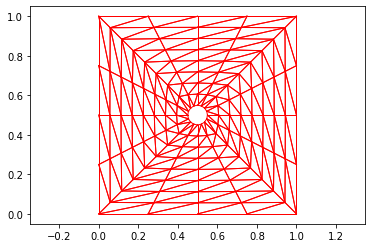

In [273]:
NL1, EL1 = void_mesh(d1,d2,p*p1,m*m1,R,element_type)

x01, y01 = NL1[EL1[:,0]-1,0], NL1[EL1[:,0]-1,1]
x11, y11 = NL1[EL1[:,1]-1,0], NL1[EL1[:,1]-1,1]
x21, y21 = NL1[EL1[:,2]-1,0], NL1[EL1[:,2]-1,1]
plt.axis('equal')
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);
EL1 = np.delete(EL1,3,1)
EL1 = EL1 - np.ones((EL1.shape[0],EL1.shape[1]))
EL1 = EL1.astype(int)

In [274]:
U = np.zeros((len(NL1)*2,1))
for i in range(len(NL1)):
    for j in range(len(NL)-p*8,len(NL)-4*p):
        if abs(NL1[i,0] - NL[j,0])<1/p/1000 and abs(NL1[i,1] - NL[j,1])<1/p/1000:
            U[i*2] = finalU[j*2]
            U[i*2+1] = finalU[j*2+1]
            if j == len(NL)-p*8:
                ikont = i

#перезаписываем новую сетку
NLfinal = NL1[ikont:,:]
for i in range(len(EL1)):
    EL1[i,0] =EL1[i,0]-ikont+1
    EL1[i,1] = EL1[i,1]-ikont+1
    EL1[i,2] = EL1[i,2]-ikont+1
ELfinal = np.zeros((1,3))
U = U[ikont*2:]
for i in range(len(EL1)):
    if EL1[i,0] > 0 and EL1[i,1] > 0 and EL1[i,2] > 0:
        ELfinal = np.append(ELfinal,[EL1[i,:]],axis = 0)
ELfinal = np.delete(ELfinal,0,axis=0)
#for i in range(len(NLfinal)):
 #   plt.plot(NLfinal[i,0],NLfinal[i,1],'b.')
ELfinal = ELfinal.astype(int)

In [275]:
ikont

112

In [276]:
for i in range(len(NL)):
    if abs(NLfinal[0,0] - NL[i,0])<1/p/100000 and abs(NLfinal[0,1] - NL[i,1])<1/p/100000:
        ikont = i

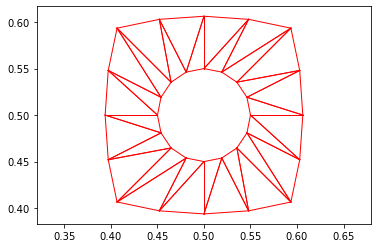

In [277]:
x01, y01 = NLfinal[ELfinal[:,0]-1,0], NLfinal[ELfinal[:,0]-1,1]
x11, y11 = NLfinal[ELfinal[:,1]-1,0], NLfinal[ELfinal[:,1]-1,1]
x21, y21 = NLfinal[ELfinal[:,2]-1,0], NLfinal[ELfinal[:,2]-1,1]

plt.axis('equal')
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);

In [278]:
ELfinal = ELfinal - np.ones((ELfinal.shape[0],ELfinal.shape[1]))
ELfinal = ELfinal.astype(int)
ln = len(NLfinal)
le = len(ELfinal)
K0 = np.zeros((ln*2,ln*2))
for i in range(0,le):
    ind = ELfinal[i,:]
    K0 = sum_K(K0,make_K(i,ELfinal,NLfinal,D),ind,i)


In [279]:
rig = np.zeros((1,ln*2))
rig1 = K0.dot(U)
#Ufin = (K0.dot(U)).T.dot(np.linalg.inv(K0))[0]
#Ufin.tofile('output1.txt', sep = ' ')
#for i in range(2*ln):
 #   if abs(U[i])>0:
  #      K0[i,:] = K0[i,:]*0
   #     K0[:,i] = K0[:,i]*0
    #    K0[i,i] = 1

Ufin = -np.linalg.solve(K0,rig1)

#for i in range(len(U)):
 #   if U[i] != 0.:
  #      Ufin[i] = U[i] 
Ufin = Ufin+U
Ufin.T.tofile('output1.txt', sep = ' ')
#Ufin = sp.linsolve(K0,rig)


Тут надо склеить узлы и элементы двух решений. 

In [280]:

ss = set()
ss1 = set()
for i in range(len(NL)-p*8,len(NL)-4*p):
    for j in range(ln):
        if abs(NLfinal[j,0] - NL[i,0])<1/p/1000 and abs(NLfinal[j,1] - NL[i,1])<1/p/1000:
            ss.add(j)
            ss1.add(i)
ss = list(ss)
ss1 = list(ss1)
ss2 = np.hstack([[ss], ss+np.ones((1,len(ss)))]) 
ss2 = ss2.astype(int)
Ufin = np.delete(Ufin,ss2[0],axis=0)
NLfinal = np.delete(NLfinal,ss,axis=0)

In [281]:
for j in range(len(ELfinal)):
    for k in range(3):      
        kk = True 
        for i in range(len(ss)):
            if ELfinal[j,k] == ss[i]: 
                ELfinal[j,k] = ss1[i]                
                kk = False #узел дублировлся в сетках, ему присваивается номер из глобальной
                break
        if kk:
            if ELfinal[j,k] < max(ss): #узел не дублируется, но лежит на границе
                ELfinal[j,k] = ikont +p*4 - ELfinal[j,k]//p1 -1 +ELfinal[j,k]
            else: ELfinal[j,k] = ikont + ELfinal[j,k] #узел внутри локальной области
NLans = np.vstack([NL[:-p*4], NLfinal])
ELans = np.vstack([EL[:-p*8], ELfinal])
Uans = np.vstack([np.array([finalU[:-p*4*2]]).T, Ufin])
ELans = ELans + np.ones((ELans.shape[0],ELans.shape[1]))
ELans = ELans.astype(int)
         
        

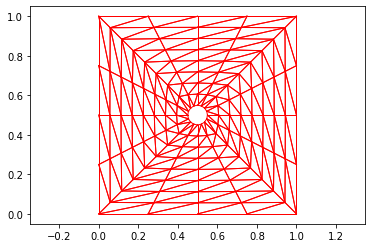

In [282]:
x01, y01 = NLans[ELans[:,0]-1,0], NLans[ELans[:,0]-1,1]
x11, y11 = NLans[ELans[:,1]-1,0], NLans[ELans[:,1]-1,1]
x21, y21 = NLans[ELans[:,2]-1,0], NLans[ELans[:,2]-1,1]
plt.axis('equal')
#for i in range(len(NLans)):
 #    plt.annotate(i,xy = (NLans[i,0],NLans[i,1]))
#plt.xlim([0.7, 0.3])
#plt.ylim([0.7, 0.3])
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);
ELans = ELans - np.ones((ELans.shape[0],ELans.shape[1]))
ELans = ELans.astype(int)


447.93916196648433
[0.39708027 0.4520076 ] [0.46464466 0.46464466] [0.45380602 0.48086583]


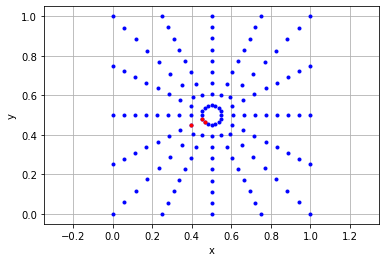

In [283]:

lnap = np.matrix([-1,-1,-1])
max_sig = 0
max_sig_i = -1
m_s=0
m_s_i=-1
Num_el = len(ELans)
for i in range(Num_el):
    B = make_B(i,ELans,NLans,D)
    Ui = np.zeros((6))
    Ui[0] = Uans[ELans[i,0]*2]
    Ui[1] = Uans[ELans[i,0]*2+1]
    Ui[2] = Uans[ELans[i,1]*2]
    Ui[3] = Uans[ELans[i,1]*2+1]  
    Ui[4] = Uans[ELans[i,2]*2]
    Ui[5] = Uans[ELans[i,2]*2+1] 
        #деформации (эпсилон)    
    Eps = B.dot(Ui)
        
        # напряжения(сигма)
    Nap = D.dot(Eps) 
    lnap = np.append(lnap,[[Nap[0],Nap[1],Nap[2]]],axis=0)
    NapM = np.matrix([[Nap[0],Nap[2]],[Nap[2],Nap[1]]])
        
    Sig,s = np.linalg.eig(NapM)         
    now_sig = ma.sqrt(Nap[0]**2-Nap[0]*Nap[1]+Nap[1]**2+3*Nap[2]**2)
        
    if now_sig > max_sig:
        max_sig = now_sig
        max_sig_i = i
print(max_sig)
a = NLans[ELans[max_sig_i,0],:]
b = NLans[ELans[max_sig_i,1],:]
c = NLans[ELans[max_sig_i,2],:]
print(a,b,c)
for i in range(len(NLans)):

    plt.plot(NLans[i,0],NLans[i,1],'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(b[0],b[1],'r.')
plt.plot(a[0],a[1],'r.')
plt.plot(c[0],c[1],'r.')
plt.axis('equal')
lnap = np.delete(lnap,0,axis = 0)